# Étude des prix du foncier à Marseille
Kenza Miousset, Nour Khenissi, Antonin Henriet

> ## Objectifs

Nous souhaitions travailler sur les prix du foncier dans une ville de France, car cela nous permettait de mettre en place tous les aspects du projet demandé : webscraping, machine learning et visualisation dans l'espace. Néanmoins, nous ne voulions pas nous tourner vers Paris, qui est une ville beaucoup étudiée et où les inégalités socio-spatiales sont déjà bien documentées. L'idée de travailler sur Marseille nous est venue en remarquant que la cité phocéenne était aussi très inégalitaire : La valeur foncière varie beaucoup selon les quartiers dans lesquels on se trouve. Nous sommes donc partis de cette base pour tenter de décrire les inégalités socio-spatiales à Marseille en se fondant sur les prix du foncier.

> ## Structure

Ce projet se structure en 4 parties :
> - **Webscraping et nettoyage des données**
> - **Analyse exploratoire descriptive des données**
> - **Modélisation de la valeur foncière en fonction des arrondissements**
> - **Cartographie des inégalités spatiales**

Les données sont téléchargées ou scrappées en ligne, puis nettoyées et mises en forme dans le dossier *Data*. Le notebook principal est **Notebook_final**, qui fait appel à d'autres notebooks.

### Importations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## I. Récupération des données et nettoyage

On se concentre sur deux bases de données. La première provient de data.gouv (https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/), mise à disposition par Demande de valeurs foncières (DVF) et qui concerne l'ensemble des transactions foncières réalisées en France hors Alsace, Moselle et Mayotte. Le deuxième a été récoltée par nos soins en scrapant le site immobilier du Figaro (https://immobilier.lefigaro.fr/prix-immobilier/marseille/ville-13055#prix-quartier) concernant Marseille. L'objectif est de déterminer si l'une des bases est plus fiable que l'autre, et la distinction de nature entre ces données (transactions *réalisées* versus prix *affichés*) comporte aussi une valeur interprétative.

> ### DVF

On récupère d'abord la base de données de Demande de valeurs foncières, présente dans le notebook *DVF.ipynb*.

In [ ]:
%run '~/work/pyhton-for-the-data-scientist/Data/DVF.ipynb'
df_DVF=df5
df_DVF

Le nettoyage des données est consultable dans le notebook *Data.ipynb* du dossier Data. On a en somme importé les données, gardé les colonnes du dataframe qui nous intéressent, gardé les données concernan  les appartements, les données concernant les "Ventes" et les données concernant Marseille.

On obtient donc 1143 observations concernant tous les arrondissements de Marseille

> ### Scraping du site du Figaro


Le code est présent dans le notebook *webscraping figaro v2-2.ipynb*, dans le dossier Data.

In [ ]:
%run '~/work/pyhton-for-the-data-scientist/Data/webscraping figaro v2-2.ipynb'
data_arr

<table class="odTable odTableAuto">
<thead>
<tr>
<th class="odGradient" style="width: 50%;">Nombre de pièces</th>
<th class="odGradient" style="width: 50%;">Prix au m2</th>
</tr>
</thead>
<tbody>
<tr>
<td>Studios / 1 pièce</td>
<td>4 457 €/m2</td>
</tr>
<tr>
<td>2 pièces</td>
<td>4 238 €/m2</td>
</tr>
<tr>
<td>3 pièces</td>
<td>3 738 €/m2</td>
</tr>
<tr>
<td>4 pièces</td>
<td>4 107 €/m2</td>
</tr>
<tr>
<td>5 pièces</td>
<td>4 530 €/m2</td>
</tr>
<tr>
<td>6 pièces</td>
<td>4 506 €/m2</td>
</tr>
<tr>
<td>7 pièces et plus</td>
<td>3 904 €/m2</td>
</tr>
</tbody>
</table>
<tr>
<td>Studios / 1 pièce</td>
<td>4 457 €/m2</td>
</tr>
<tr>
<td>2 pièces</td>
<td>4 238 €/m2</td>
</tr>
<td>2 pièces</td>
2 pièces
2 pièces
4 238 €/m2
['Studios / 1 pièce', '4\xa0457 €/m2']
['2 pièces', '4\xa0238 €/m2']
['3 pièces', '3\xa0738 €/m2']
['4 pièces', '4\xa0107 €/m2']
['5 pièces', '4\xa0530 €/m2']
['6 pièces', '4\xa0506 €/m2']
['7 pièces et plus', '3\xa0904 €/m2']
<tr>
<td><strong><a href="https://immobilier.

,prix m2,loyer m2
Marseille 1er Arrondissement,3 610 €/m2,17 €/m2
Marseille 2e Arrondissement,3 967 €/m2,17 €/m2
Marseille 3e Arrondissement,2 171 €/m2,16 €/m2
Marseille 4e Arrondissement,3 321 €/m2,16 €/m2
Marseille 5e Arrondissement,3 784 €/m2,18 €/m2
Marseille 6e Arrondissement,4 316 €/m2,18 €/m2
Marseille 7e Arrondissement,5 603 €/m2,19 €/m2
Marseille 8e Arrondissement,5 686 €/m2,18 €/m2
Marseille 9e Arrondissement,4 529 €/m2,17 €/m2
Marseille 10e Arrondissement,3 531 €/m2,16 €/m2


Le dataframe qu'on obtient, *data_arr*, paraît plus cohérent que le dataframe *df_DVF*.

## II. Analyse descriptive exploratoire



Code service sages            100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.915336
No voie                        35.686981
B/T/Q                          95.316833
Type de voie                   38.409037
Code voie                       0.767595
Voie                            0.772418
Code postal                     0.770589
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.549758
Section                         0.004091
No plan                         0.000000
No Volume                      99.783828
1er lot         

<Figure size 1600x800 with 0 Axes>

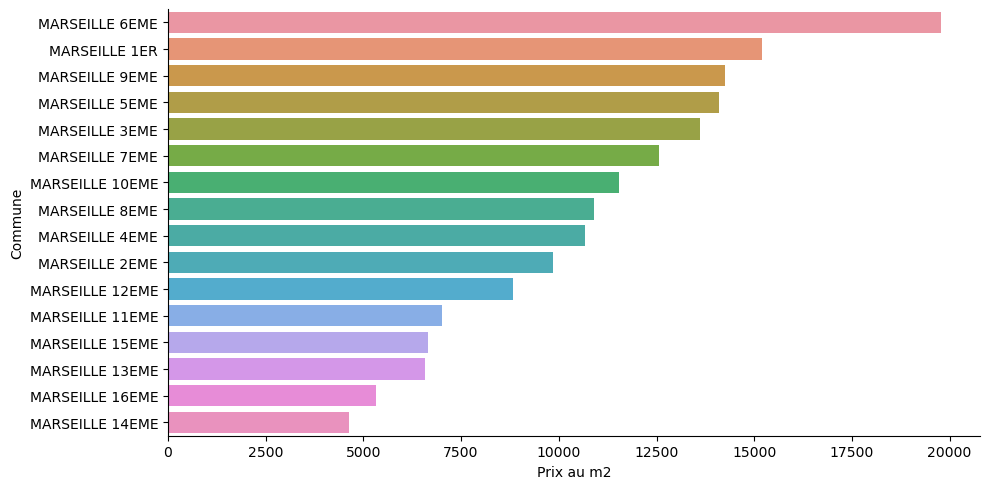

In [ ]:
%run '~/work/pyhton-for-the-data-scientist/Statdes.ipynb'

Ainsi, les biens immobiliers construits dont le prix de vente au $m{^2}$ était le plus élevé en 2021 se situent dans les premiers arrondissements de Marseille, en particulier le 6ème, le 1er, le 3ème et le 5ème. On doit cependant considérer que les maisons ne sont ici pas prises en compte, ce qui changerait certainement l'ordre de ces arrondissements.

## Modélisations des prix des valeurs foncières



In [ ]:
#Le code est présent dans le notebook *Modelisation.ipynb

In [1]:
%run '~/work/pyhton-for-the-data-scientist/Modelisation.ipynb'

ERROR:root:File `'/root/work/pyhton-for-the-data-scientist/Modelisation.ipynb.py'` not found.



Pour la modélisation, on a choisi la base de donnée df_dvf puisqu'elle comporte plus de données et on a gardé comme variables explicatives : 


*   Variable numérique: "surface relle bâti"
*   Variables catégorielles: "Code postal", "code departement" , "code commune", "code voie" et "code voie"

Nous avons utilisé les modèles de régression Lasso, SVM et Random Forest pour prédire les valeurs foncières à partir de différentes variables explicatives relatives à l'emplacement des biens immobiliers. En utilisant les métriques de performance R2, MSE et MAE, nous avons constaté que ces modèles présentaient une performance faible, ce qui signifie qu'ils ne parvenaient pas à expliquer de manière significative la variance des données ou à prédire correctement les valeurs cibles (valeurs foncières).

Il y a plusieurs raisons qui peuvent expliquer une telle performance. Tout d'abord, il est possible que les variables explicatives choisies ne soient pas suffisamment corrélées à la variable cible, ce qui rend difficile la prédiction de cette dernière. Dans ce cas, il serait recommandé de sélectionner de nouvelles variables explicatives autres que celles en relation avec l'emplacement géographique du bien et qui soient plus pertinentes permettant une meilleure explication de la variance des données. 

Il est également possible que le modèle choisi ne soit pas adapté aux données. Chaque modèle a ses propres spécificités et peut être plus ou moins adapté à certaines situations. Dans ce cas, il serait recommandé de tester d'autres modèles et de comparer leurs performances afin de choisir celui qui convient le mieux aux données.

Enfin, il peut être nécessaire de collecter de nouvelles données pour entraîner le modèle. Plus le modèle dispose de données, plus il est en mesure d'apprendre et de s'adapter aux données, ce qui peut améliorer sa performance.

En résumé, pour améliorer la performance des modèles de régression Lasso, SVM et Random Forest, nous recommandons de sélectionner de nouvelles variables explicatives pertinentes, de tester différents modèles et de collecter de nouvelles données pour entraîner le modèle.

## Visualisation des prix affichés par arrondissement

## Conclusion

On remarque que les prix du foncier à Marseille sont très disparates, et la ville est très inégalitaire.